# Week 7 - Class

To set up this notebook:

```
conda create -n graphviz python=3 numpy scipy matplotlib ipykernel
conda activate graphviz
pip install graphviz
```

Make sure you've also installed [GraphViz](https://graphviz.org/) and that the executables are on the path.

In [1]:
import graphviz
from collections import defaultdict
infinity = float('inf')

In [2]:
def visualise(G, W):
    dot = graphviz.Digraph()
    dot.attr(rankdir='LR')
    for u in G.keys():
        dot.node(str(u))
        for v in G[u]:
            dot.edge(str(u), str(v), label=str(W[u, v]))
    return dot

def graph_from_edges(edges):
    # assume edges = list of triples (u, v, w)
    nodes = sorted(list(set([u for u, v, w in edges]+[v for u, v, w in edges])))
    G = defaultdict(list)
    W = {}
    for u, v, w in edges:
        G[u].append(v)
        W[u, v] = w
    return G, W

### Give an example to show that Dijkstra's algorithm fails on graphs if you allow negative weights. Why does it fail?

### What is the shortest (weighted) path from A to D in the graph below?

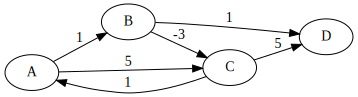

In [3]:
edges_problematic = [
    ('A', 'B', 1),
    ('B', 'C', -3),
    ('C', 'A', 1),
    ('A', 'C', 5),
    ('B', 'D', 1),
    ('C', 'D', 5),
]
visualise(*graph_from_edges(edges_problematic))

### Design an algorithm (using the hints below) that can find the shortest paths from a single source to all destinations even if negative weights are allowed, and will raise an error if this cannot be done. Verify that this works on your example, and the example given above.

You should use the following data structures. The map ``shortest[v]`` stores the current best distance from the start to the vertex ``v``. The map ``predecessor[v]`` gives the previous vertex on the path from the start vertex to ``v`` for the shortest path found so far (assuming such a path has been found).

The relaxation operation on an edge $(u, v)$ with weight $w$ should check if the shortest path found so far from the start to $u$ and then from $u$ to $v$ is better than the shortest path found so far from the start to $v$, and if so, update the data structures. This operation is also used in Dijkstra's algorithm.

What happens if you relax every edge in the graph?

How many times should you do this? Think about the largest number of possible vertices in a shortest weighted path in the graph.

How can you detect if there is a problem?

### What is the complexity of this algorithm?